<a href="https://colab.research.google.com/gist/NifpdDD/0c12f2979b16b55a9ba1df0fea7891ee/.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import os
from os import path
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [16]:
sales = pd.read_csv('Weekly demand for a plastic container Montgomery  Johnson.csv')

In [17]:
sales["x"] = sales["x"].fillna(sales["x"].mean())
sales.head()


,Unnamed: 0,x
0,1,5000
1,2,4965
2,3,4496
3,4,4491
4,5,4566


In [18]:
sales.describe()

,Unnamed: 0,x
count,100.000000,100.000000
mean,50.500000,5985.160000
std,29.011492,782.603525
min,1.000000,4491.000000
25%,25.750000,5436.250000
50%,50.500000,6031.500000
75%,75.250000,6657.750000
max,100.000000,7411.000000


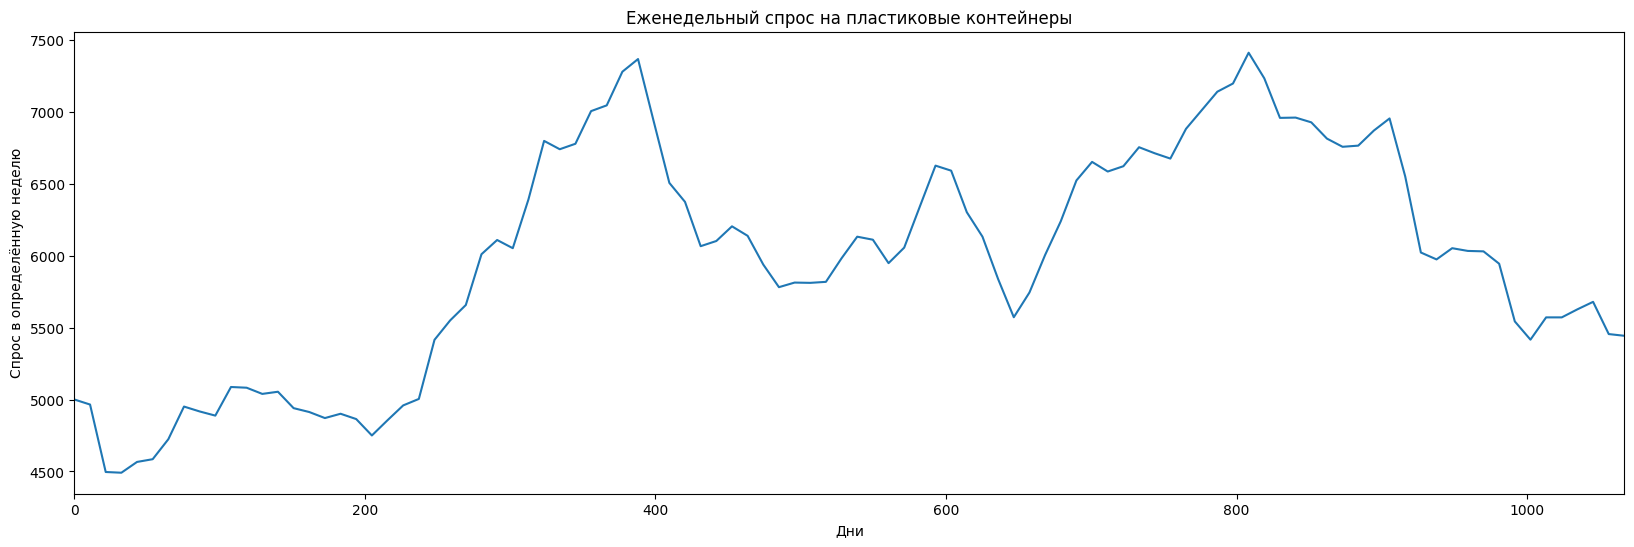

In [19]:
time_axis = np.linspace(0, 1067, len(sales["x"]))
plt.figure(figsize=(20, 6))
plt.plot(time_axis, sales["x"].fillna(sales["x"].mean()))

# заголовки
plt.title('Еженедельный спрос на пластиковые контейнеры')
plt.xlabel('Дни')
plt.ylabel('Спрос в определённую неделю')

# команда на отрисовку
plt.xlim(0, 1067)
plt.show()

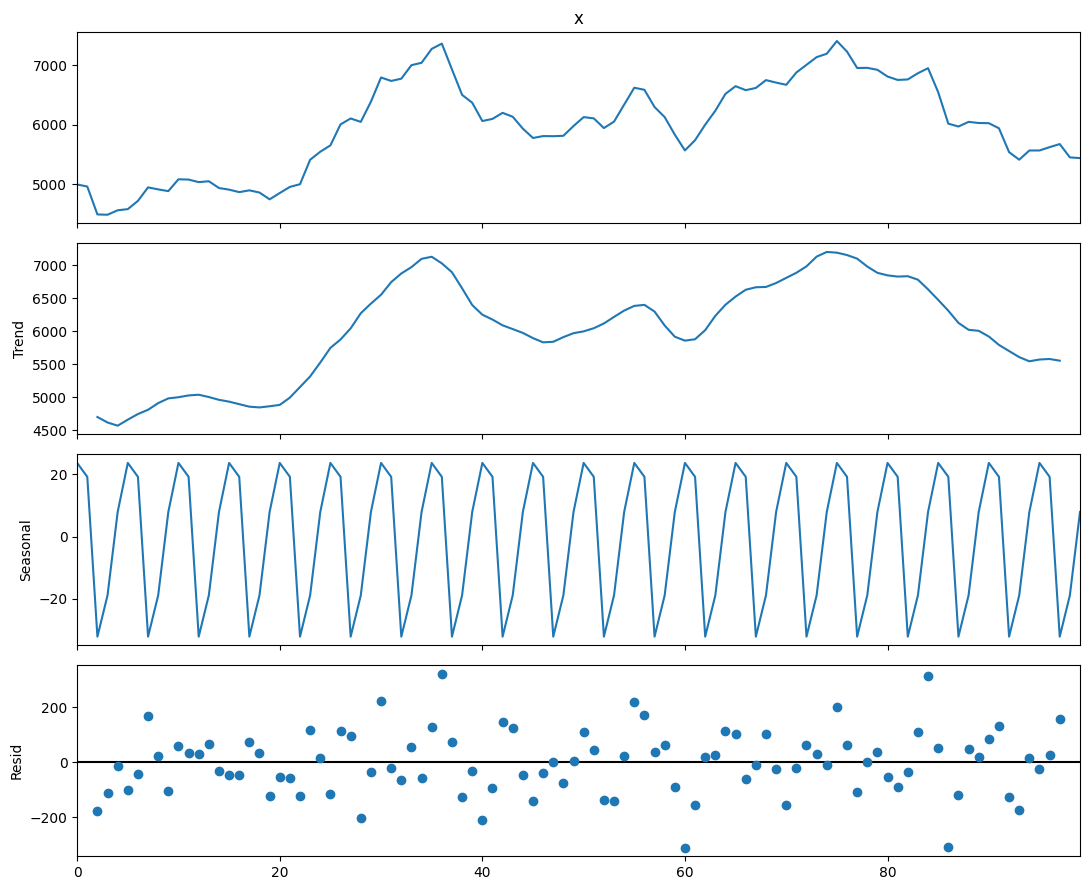

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

# задаем размер графика
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9


# применяем функцию к данным о продажах
decompose = seasonal_decompose(sales["x"], period=5)
decompose.plot()
plt.show()

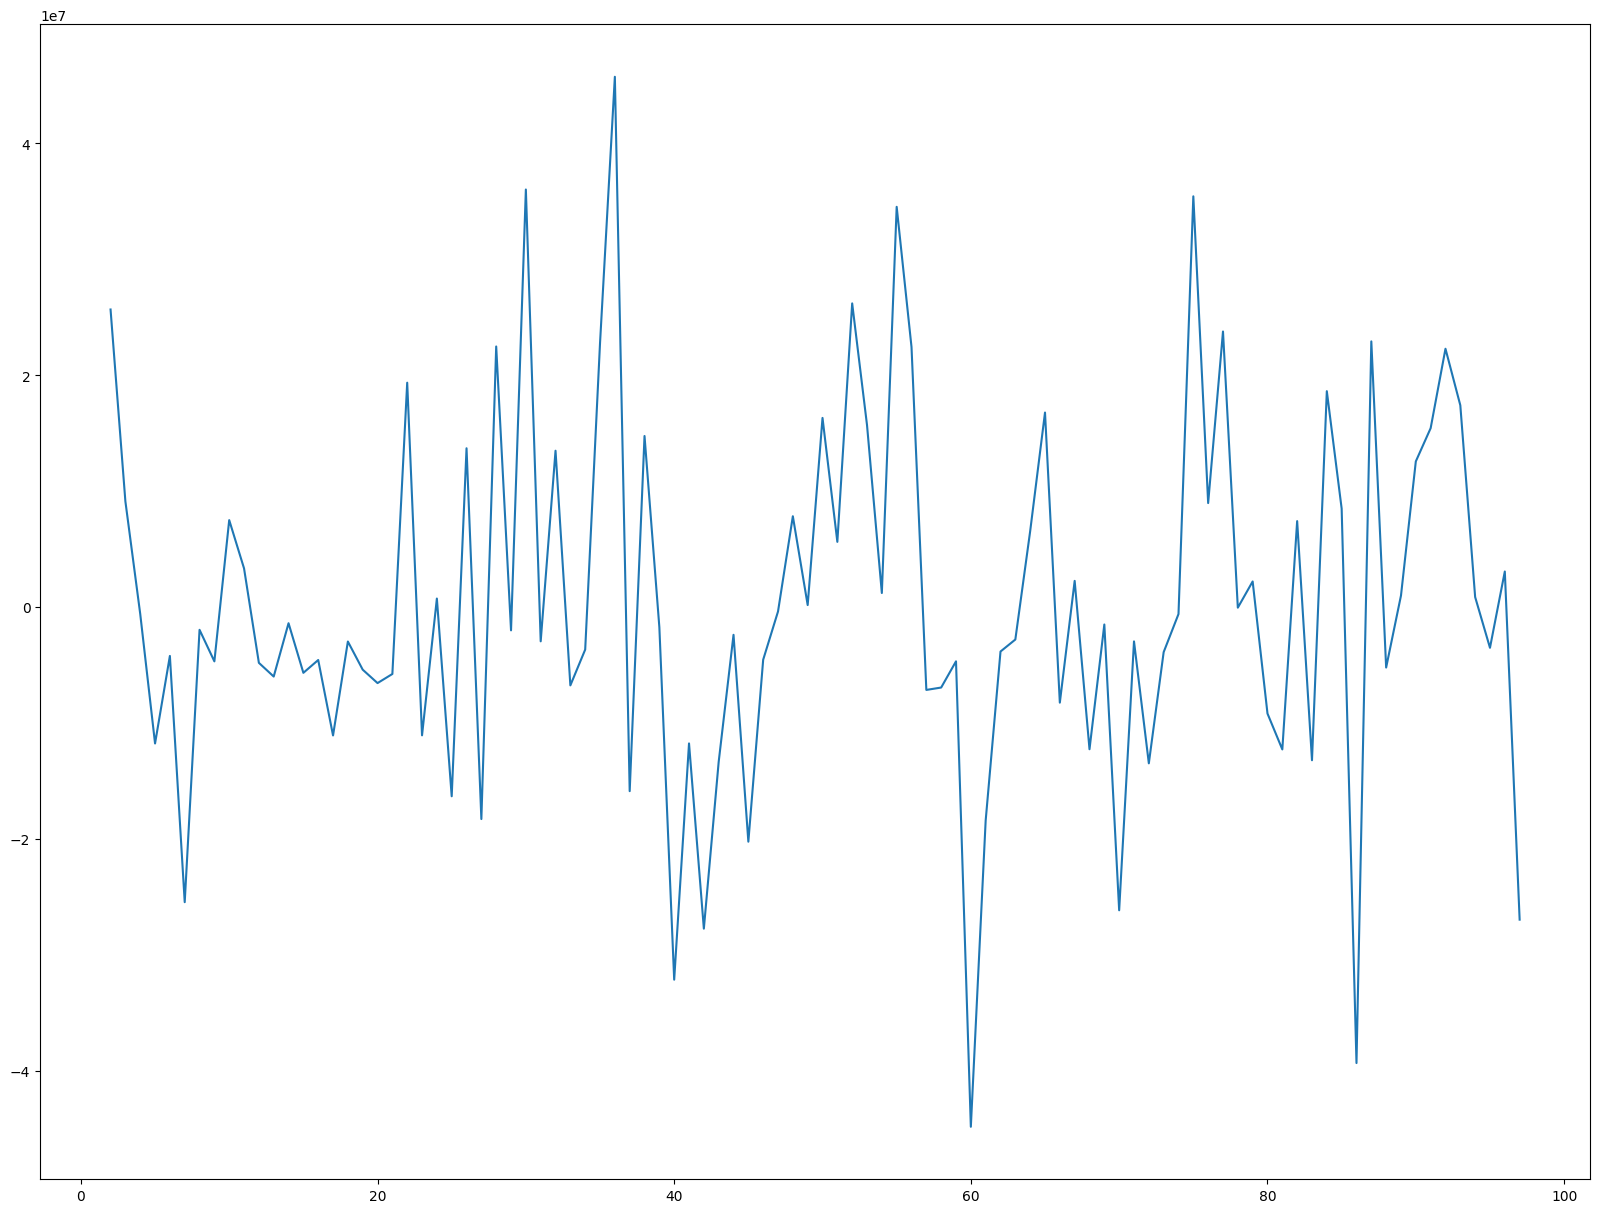

In [21]:
new_ps = decompose.trend*(decompose.seasonal+1)*decompose.resid

fig, axs = plt.subplots(figsize=(20, 15))

plt.plot(new_ps)
plt.show()

<Axes: >

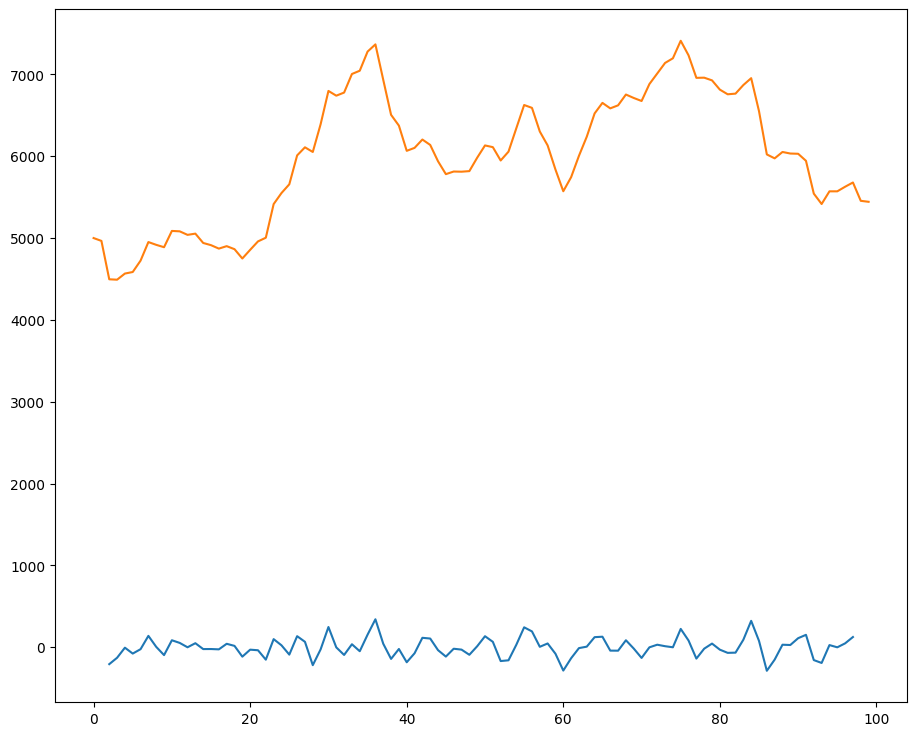

In [22]:
# удаляем компонент тренда из временного ряда...
sales_r = sales["x"] - decompose.trend
# ...и отрисовываем обработанный и исходный ряды
sales_r.plot()
sales["x"].plot()

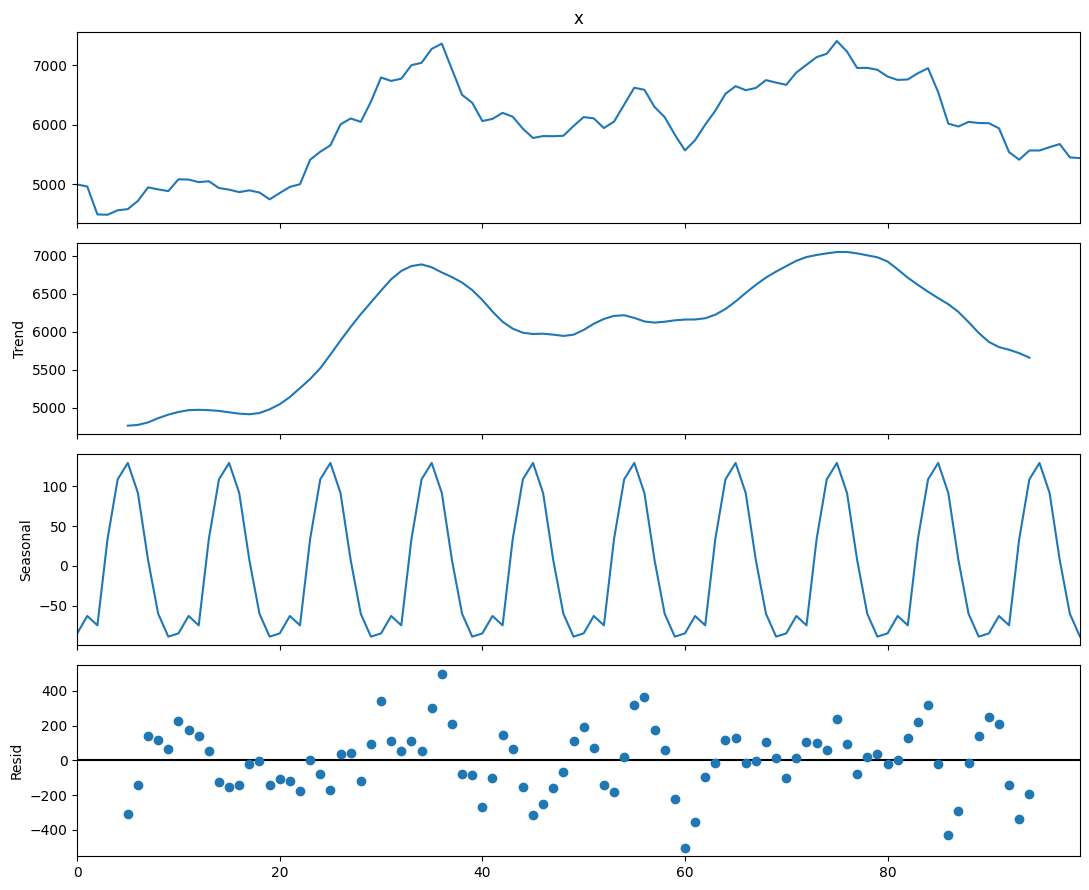

In [23]:
# разложение на составляющие продажи
decompose = seasonal_decompose(sales["x"], period=10, model="additive")
decompose.plot()
plt.show()

In [24]:
from statsmodels.tsa.stattools import adfuller

# Тест Дики-Фулера
alpha = 0.05
name = "Продажи"
ts = sales["x"]

print(f'Тест Дики-Фуллера ряда {name} :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда Продажи :
Test Statistic                 -2.545720
p-value                         0.104743
#Lags Used                      6.000000
Number of Observations Used    93.000000
Critical Value (1%)            -3.502705
Critical Value (5%)            -2.893158
Critical Value (10%)           -2.583637
dtype: float64
Значение p больше 5.0%. Ряд не стационарный.


<ipython-input-25-f344fd7cfc96>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(rolling_mean, 'g', label='MA'+str(window),


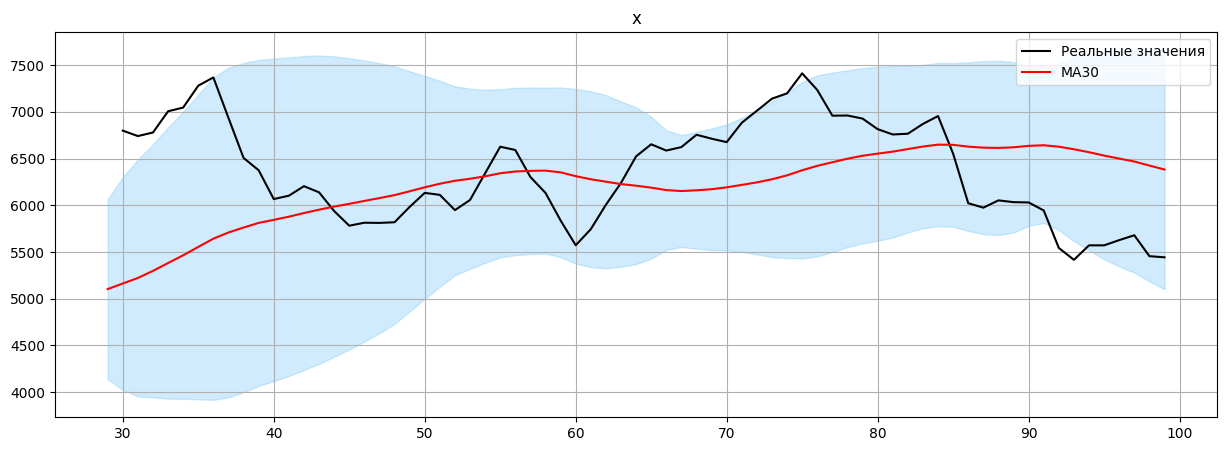

In [25]:
# указываем размер окна
window = 30

# вычисляем скользящее среднее и стандартное отклонение
rolling_mean = ts.rolling(window=window).mean()
rolling_std = ts.rolling(window=window).std()

plt.figure(figsize=(15,5))
plt.title(ts.name)
plt.plot(ts[window:], label='Реальные значения', color="black")

# отрисовываем скользящее среднее
plt.plot(rolling_mean, 'g', label='MA'+str(window),
             color="red")

# отрисовываем верхний и нижний интервалы
lower_bound = rolling_mean - (1.96 * rolling_std)
upper_bound = rolling_mean + (1.96 * rolling_std)

plt.fill_between(x=ts.index, y1=lower_bound, y2=upper_bound,
                 color='lightskyblue', alpha=0.4)
plt.legend(loc='best')
# показываем сетку на графике
plt.grid(True)
plt.show()

<Figure size 1200x700 with 0 Axes>

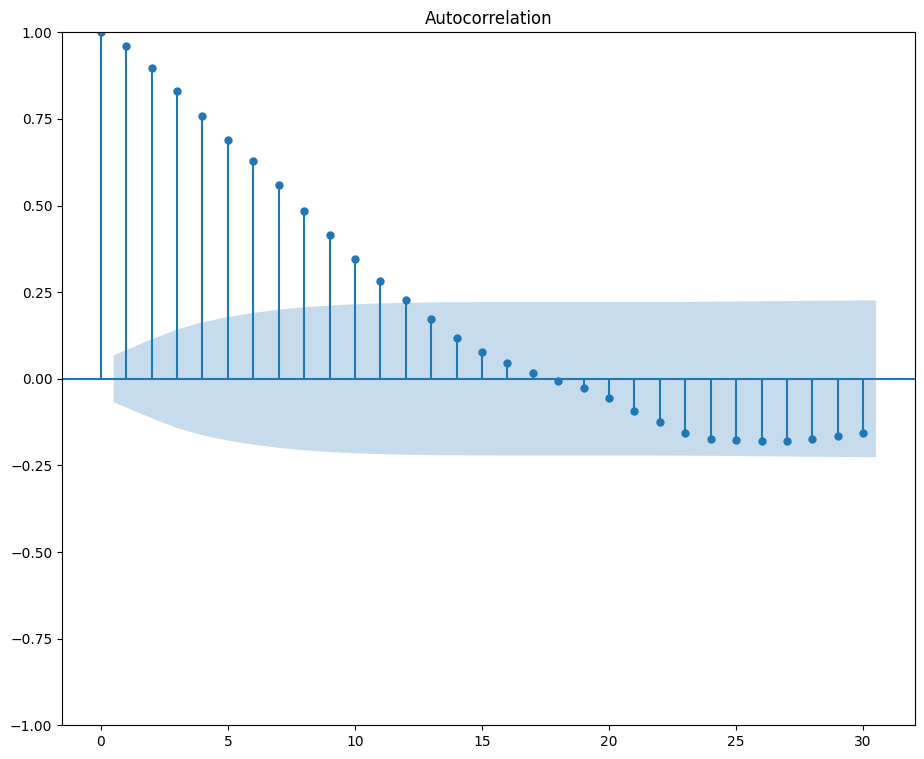

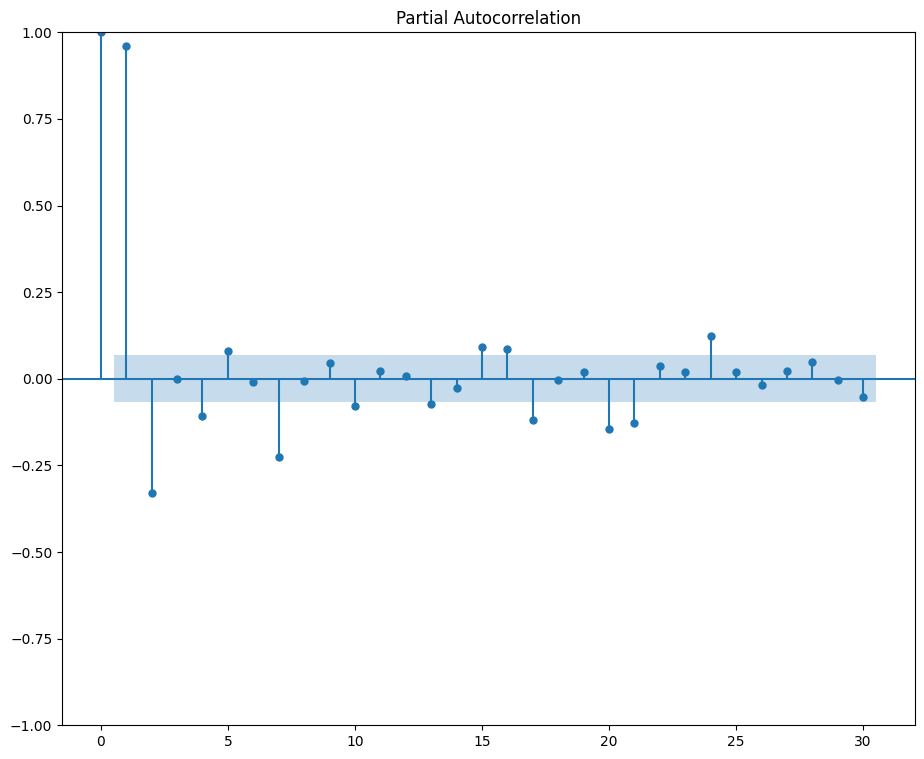

In [26]:
import statsmodels.tsa.api as smt

ts = sales["x"]


fig = plt.figure(figsize=(12, 7))
ac_plot = smt.graphics.plot_acf(ts, lags=30, alpha=0.5)

pac_plot = smt.graphics.plot_pacf(ts, lags=30, alpha=0.5)

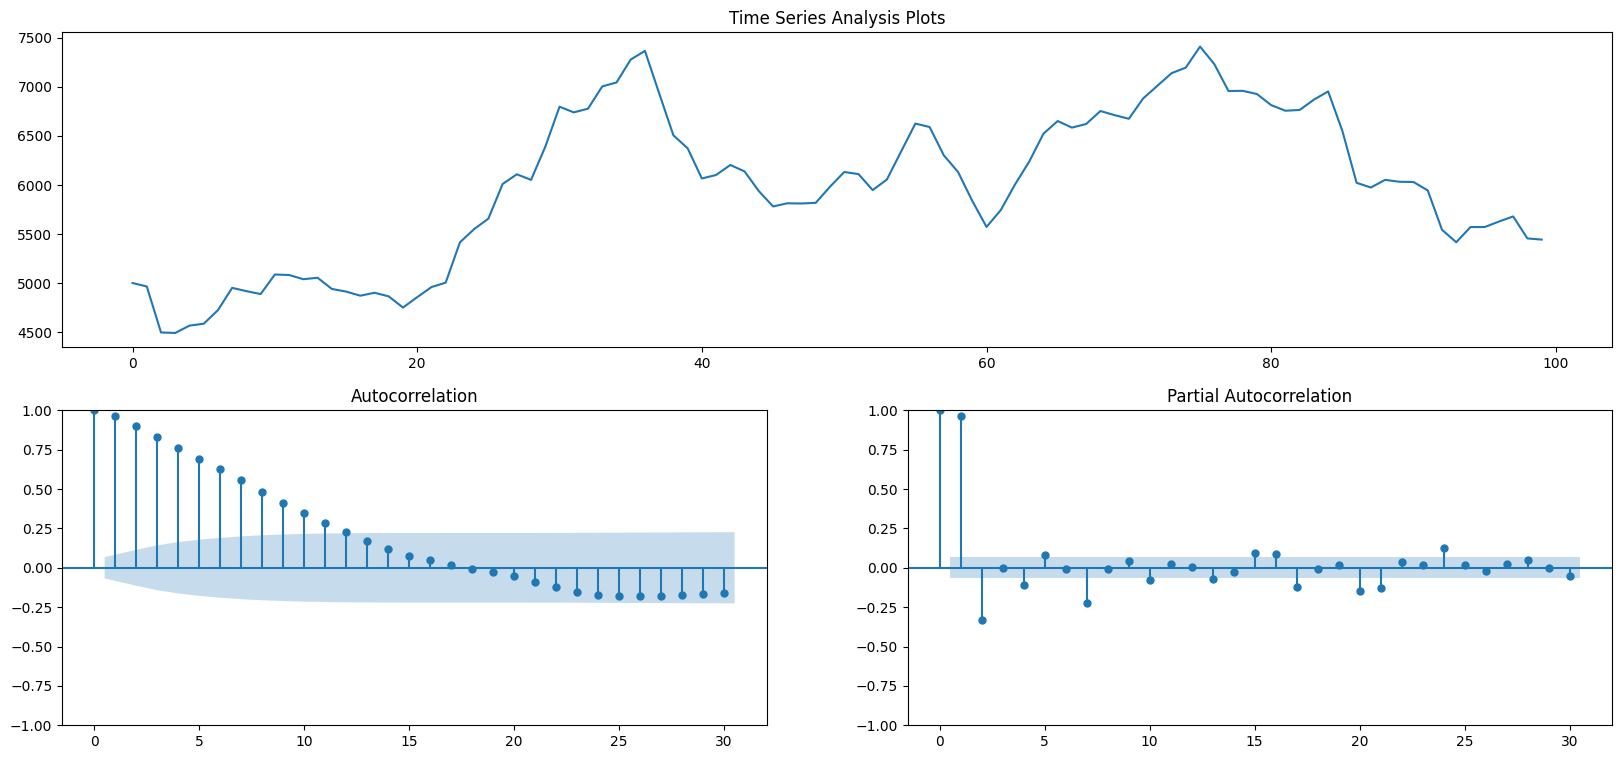

In [27]:
fig = plt.figure(figsize=(20, 9))
layout = (2, 2)
ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
acf_ax = plt.subplot2grid(layout, (1, 0))
pacf_ax = plt.subplot2grid(layout, (1, 1))

ts.plot(ax=ts_ax)
ts_ax.set_title('Time Series Analysis Plots')
smt.graphics.plot_acf(ts, lags=30, ax=acf_ax, alpha=0.5)
smt.graphics.plot_pacf(ts, lags=30, ax=pacf_ax, alpha=0.5)
None